# Example statistic evalution of short version of PARCZ database 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading of dataset

In [3]:
parcz_features = pd.read_csv('parcz_features.csv')
parcz_features.sample(10, random_state=42) 

,filename,speaker_id,label,gender,durmad,durmed,duv,hnr,jitter,mpt,ppr,relF0SD,relF1SD,relF2SD,relSEOSD,shimmer,spir
668,P2046_9.1-3_1.wav,P2046,1,M,NaN,NaN,1.877470,-0.230917,0.098219,0.871,0.000000,2.558537,2.885835,5.088737,0.407488,0.083165,0.000000
324,K2016_7.1-1-e_1.wav,K2016,0,M,0.000000,0.0530,22.427441,1.960105,0.129977,0.241,0.000000,1.642303,2.137570,4.236780,0.495330,0.132259,2.439024
624,P2046_10.6-1_1.wav,P2046,1,M,NaN,NaN,23.092784,0.863411,0.084903,0.341,0.000000,2.666638,2.463301,4.585705,0.257982,0.073416,0.000000
690,P2111_10.2-3_1.wav,P2111,1,M,NaN,NaN,5.511811,-0.451522,0.196019,0.524,0.000000,1.465489,2.439419,4.857185,0.617498,0.162263,0.000000
473,P1031_10.6-2_1.wav,P1031,1,F,NaN,NaN,7.780320,3.456115,0.112065,0.364,0.000000,2.131907,2.360834,4.897409,0.329766,0.056165,0.000000
204,K1021_8.4-4_1.wav,K1021,0,F,0.000000,0.0810,19.533528,3.410369,0.171218,0.945,0.000000,2.286961,3.077585,4.634484,0.336986,0.114936,0.712981
97,K1007_7.1-2-a_1.wav,K1007,0,F,0.000000,0.0560,15.439309,4.996380,0.043581,1.584,0.000000,4.628364,2.556135,5.453649,0.109177,0.035614,0.500000
336,K2016_7.1-3-i_1.wav,K2016,0,M,NaN,NaN,9.619952,3.733068,0.118517,0.716,0.000000,2.170215,2.111682,4.818900,0.556168,0.031350,0.000000
568,P1086_7.1-3-o_1.wav,P1086,1,F,0.000000,0.0710,12.335958,8.200421,0.096664,0.594,0.000000,2.682757,1.932005,6.234333,0.355053,0.022540,1.261730
148,K1007_9.2-l-4_1.wav,K1007,0,F,0.023917,0.0945,17.816870,2.472193,0.228846,0.265,26.028197,2.204712,3.921824,5.202103,0.454110,0.340050,5.339117


### Create new DataFrame for mpt feature only on prelonged vowel excercises

In [4]:
parcz_features_mpt = parcz_features[parcz_features['filename'].str.contains('7.1-2')]
parcz_features_mpt = parcz_features_mpt[['mpt']]
parcz_features_mpt

,mpt
23,0.555
24,0.603
25,0.544
26,0.507
37,1.260
97,1.584
98,0.425
99,0.315
100,0.489
101,0.166


## Replace 0.0 with NaN

In [9]:
parcz_features_Nan = parcz_features.apply(lambda col: col.replace(0, np.nan) if col.name != 'label' else col).drop(['mpt'], axis=1)
parcz_features_Nan

,filename,speaker_id,label,gender,durmad,durmed,duv,hnr,jitter,ppr,relF0SD,relF1SD,relF2SD,relSEOSD,shimmer,spir
0,K1006_10.3-1_1.wav,K1006,0,F,NaN,NaN,42.982456,4.605839,0.128743,NaN,1.734168,2.172815,4.785386,0.311031,0.085879,NaN
1,K1006_10.1-1_1.wav,K1006,0,F,NaN,NaN,16.521739,3.008517,0.109911,NaN,2.052589,2.625919,4.764778,0.405647,0.080786,NaN
2,K1006_10.1-2_1.wav,K1006,0,F,NaN,NaN,15.384615,3.867363,0.119543,NaN,2.031448,2.465183,4.454674,0.311138,0.075396,NaN
3,K1006_10.1-3_1.wav,K1006,0,F,NaN,0.055,17.391304,3.387303,0.114215,NaN,2.116806,2.305715,5.049837,0.333100,0.068851,1.716554
4,K1006_10.2-1_1.wav,K1006,0,F,NaN,NaN,65.633423,0.770474,0.131755,NaN,1.632319,2.181241,4.638631,0.668383,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,P2111_9.2-l-4_1.wav,P2111,1,M,0.012000,0.083,4.693878,1.176517,0.211771,4.072478,2.030899,2.530519,4.918086,0.699687,0.087850,1.612863
764,P2111_0.0_1.wav,P2111,1,M,0.007088,0.063,5.541470,3.140119,0.197569,NaN,1.825614,2.169410,5.677981,0.720487,0.132427,4.119967
765,P1086_0.0_1.wav,P1086,1,F,NaN,NaN,8.155209,2.999069,0.254246,NaN,1.811994,2.710736,5.179009,0.636865,0.082314,NaN
766,P2046_0.0_1.wav,P2046,1,M,0.015877,0.065,14.721724,2.557074,0.082628,2.829979,1.718158,8.741670,4.613120,1.285976,0.156699,2.044472


## Creation of final DataFrame

In [13]:
parcz_df = pd.concat([parcz_features_Nan,parcz_features_mpt], axis=1)
parcz_df

,filename,speaker_id,label,gender,durmad,durmed,duv,hnr,jitter,ppr,relF0SD,relF1SD,relF2SD,relSEOSD,shimmer,spir,mpt
0,K1006_10.3-1_1.wav,K1006,0,F,NaN,NaN,42.982456,4.605839,0.128743,NaN,1.734168,2.172815,4.785386,0.311031,0.085879,NaN,NaN
1,K1006_10.1-1_1.wav,K1006,0,F,NaN,NaN,16.521739,3.008517,0.109911,NaN,2.052589,2.625919,4.764778,0.405647,0.080786,NaN,NaN
2,K1006_10.1-2_1.wav,K1006,0,F,NaN,NaN,15.384615,3.867363,0.119543,NaN,2.031448,2.465183,4.454674,0.311138,0.075396,NaN,NaN
3,K1006_10.1-3_1.wav,K1006,0,F,NaN,0.055,17.391304,3.387303,0.114215,NaN,2.116806,2.305715,5.049837,0.333100,0.068851,1.716554,NaN
4,K1006_10.2-1_1.wav,K1006,0,F,NaN,NaN,65.633423,0.770474,0.131755,NaN,1.632319,2.181241,4.638631,0.668383,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,P2111_9.2-l-4_1.wav,P2111,1,M,0.012000,0.083,4.693878,1.176517,0.211771,4.072478,2.030899,2.530519,4.918086,0.699687,0.087850,1.612863,NaN
764,P2111_0.0_1.wav,P2111,1,M,0.007088,0.063,5.541470,3.140119,0.197569,NaN,1.825614,2.169410,5.677981,0.720487,0.132427,4.119967,NaN
765,P1086_0.0_1.wav,P1086,1,F,NaN,NaN,8.155209,2.999069,0.254246,NaN,1.811994,2.710736,5.179009,0.636865,0.082314,NaN,NaN
766,P2046_0.0_1.wav,P2046,1,M,0.015877,0.065,14.721724,2.557074,0.082628,2.829979,1.718158,8.741670,4.613120,1.285976,0.156699,2.044472,NaN


## Statistics of whole dataset

In [14]:
parcz_df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,768.0,0.500000,0.500326,0.000000,0.000000,0.500000,1.000000,1.000000
durmad,144.0,0.022228,0.029579,0.000500,0.007875,0.013167,0.025269,0.238583
durmed,393.0,0.078777,0.030202,0.050000,0.060000,0.070000,0.086500,0.315000
duv,761.0,18.870600,17.213743,0.174538,6.472197,12.941176,25.595985,88.390244
hnr,768.0,2.477249,2.019299,-2.105977,0.938040,2.510573,3.685004,8.914084
jitter,768.0,0.155414,0.074349,0.006718,0.103678,0.142683,0.201494,0.435437
ppr,112.0,14.378273,10.888065,0.693500,6.732890,11.640213,19.285422,61.545486
relF0SD,768.0,2.468646,1.689537,0.936630,1.779326,2.089464,2.518693,14.198028
relF1SD,768.0,2.917154,1.641666,1.458745,2.317648,2.508292,2.840388,15.443646
relF2SD,768.0,4.778126,1.181165,3.060630,4.303345,4.588663,4.879107,15.519752


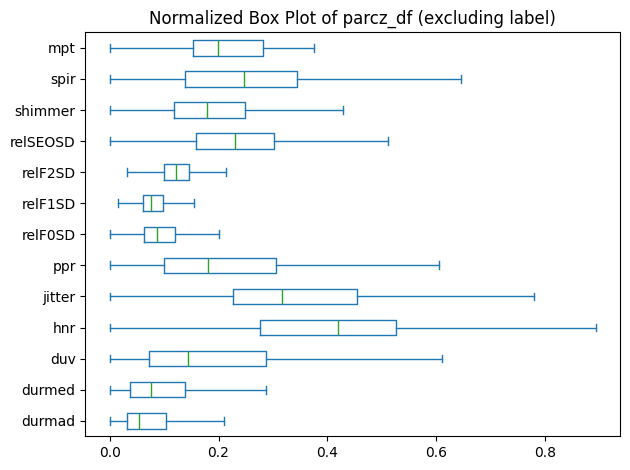

In [ ]:
numeric_cols = parcz_df.select_dtypes(include=[np.number]).columns
parcz_df_norm = (parcz_df[numeric_cols] - parcz_df[numeric_cols].min()) / (parcz_df[numeric_cols].max() - parcz_df[numeric_cols].min())
parcz_df_norm.drop(columns=['label']).plot.box(showfliers=False, vert=False)
plt.title('Normalized Box Plot of parcz_df')
plt.tight_layout()
plt.show()

## Statistics dataset sorted by gender

In [30]:
parcz_df.groupby('gender').describe().T

gender                F           M
label count  461.000000  307.000000
      mean     0.501085    0.498371
      std      0.500542    0.500814
      min      0.000000    0.000000
      25%      0.000000    0.000000
...                 ...         ...
mpt   min      0.166000    0.161000
      25%      0.433750    0.432000
      50%      0.508000    0.519000
      75%      0.597500    0.730000
      max      1.912000    1.303000

[112 rows x 2 columns]

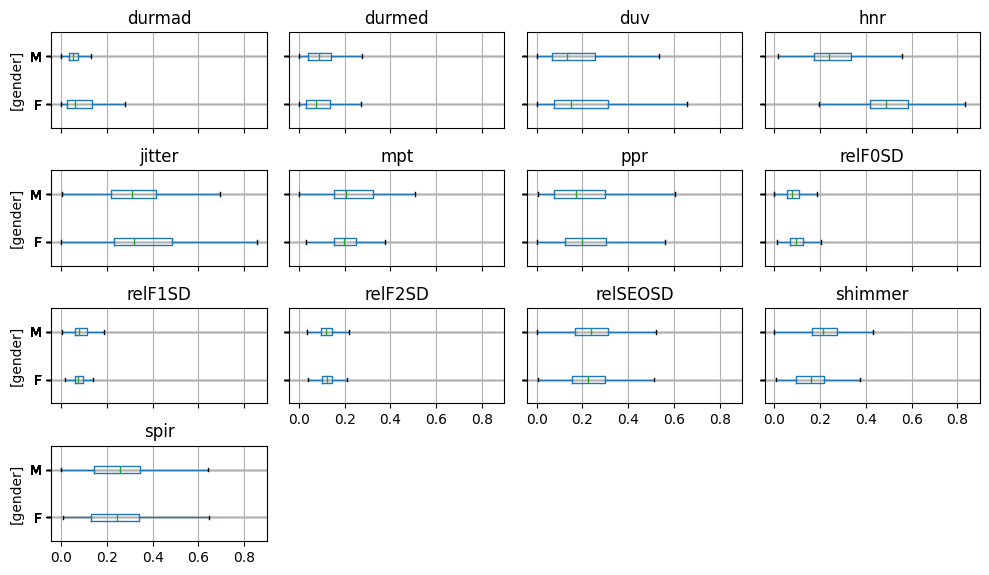

In [32]:
parcz_df_norm.drop(columns=['label']).join(parcz_df['gender']).boxplot(by='gender', vert=False, showfliers=False, figsize=(10,6))
plt.suptitle('')
plt.title('Normalized Box Plot of parcz_df by Gender')
plt.tight_layout()
plt.show()

## Statistics dataset sorted by diagnosis

In [10]:
parcz_features_Nan.groupby('label').describe().T

label                 0          1
durmad count  81.000000  63.000000
       mean    0.022522   0.021850
       std     0.028240   0.031444
       min     0.001000   0.000500
       25%     0.008000   0.008250
...                 ...        ...
spir   min     0.072059   0.085233
       25%     0.879085   0.819651
       50%     1.520768   1.418314
       75%     2.064294   1.960544
       max     5.339117   5.713606

[104 rows x 2 columns]

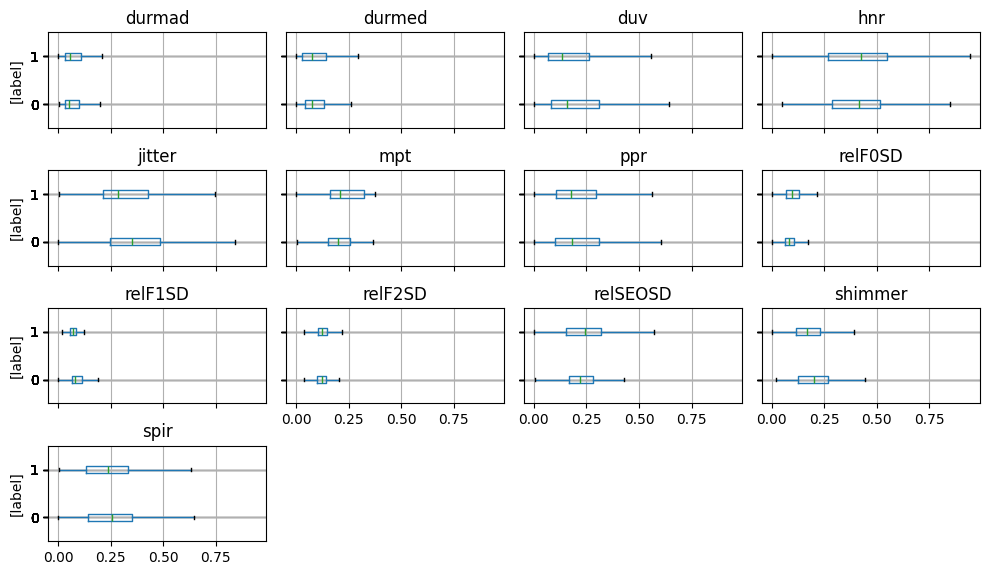

In [ ]:
parcz_df_norm.drop(columns=['label']).join(parcz_df['label']).boxplot(by='label', vert=False, showfliers=False, figsize=(10,6))
plt.suptitle('')
plt.title('Normalized Box Plot of parcz_df by Gender')
plt.tight_layout()
plt.show()

## Statistics dataset sorted by speaker

In [11]:
parcz_features_Nan.groupby('speaker_id').describe().T

speaker_id       K1006      K1007      K1021      K2011      K2016      P1021  \
label count  77.000000  76.000000  77.000000  77.000000  77.000000  73.000000   
      mean    0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
      std     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
      min     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
      25%     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
...                ...        ...        ...        ...        ...        ...   
spir  min     0.206468   0.131947   0.189213   0.415358   0.072059   0.138049   
      25%     0.881009   1.201209   0.866715   1.123596   0.775982   0.938389   
      50%     1.500000   1.398479   1.565200   1.509363   1.538883   1.581798   
      75%     2.197500   2.448927   1.873427   2.093967   1.891061   2.146672   
      max     5.194564   5.339117   3.635950   4.534890   3.686211   4.544809   

speaker_id       P1031      P1086      P2046      P2111  
label count  83.000000  75.000000  76.000000  77.000000  
      mean    1.000000   1.000000   1.000000   1.000000  
      std     0.000000   0.000000   0.000000   0.000000  
      min     1.000000   1.000000   1.000000   1.000000  
      25%     1.000000   1.000000   1.000000   1.000000  
...                ...        ...        ...        ...  
spir  min     0.227013   0.180913   0.085233   0.269537  
      25%     0.680612   0.654363   0.876853   0.961481  
      50%     1.315696   1.159492   1.618044   1.500000  
      75%     1.838898   1.456450   2.083062   1.989802  
      max     5.713606   3.258490   4.544809   4.119967  

[112 rows x 10 columns]

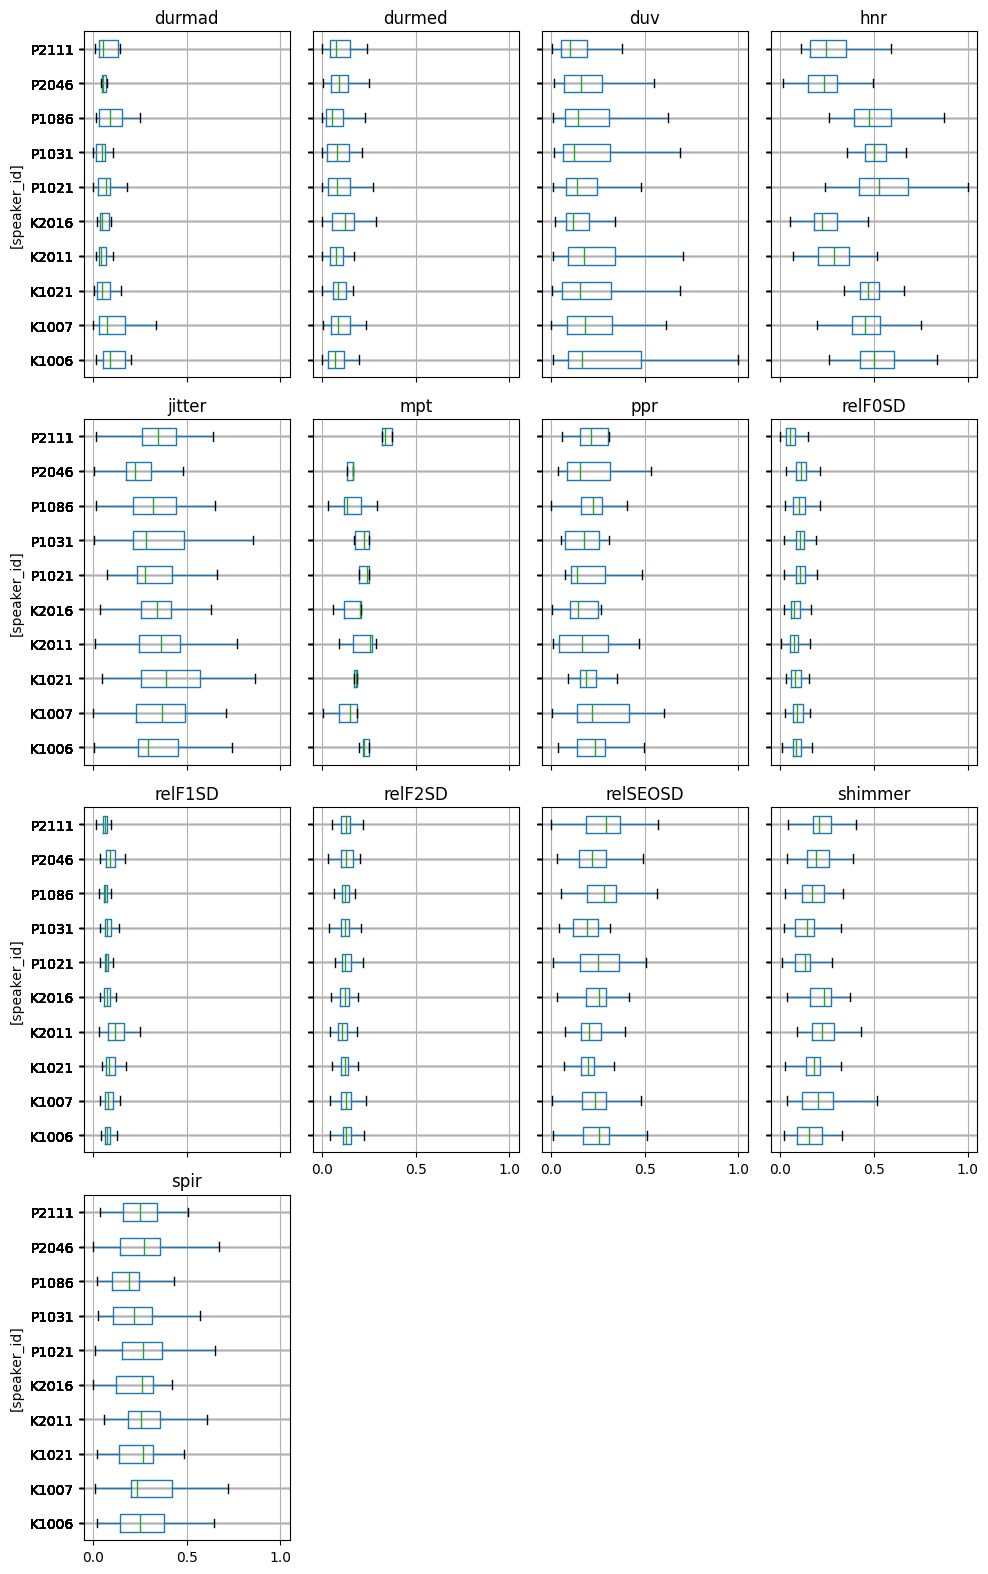

In [45]:
parcz_df_norm.drop(columns=['label']).join(parcz_df['speaker_id']).boxplot(by='speaker_id', vert=False, showfliers=False, figsize=(10,16))
plt.suptitle('')
plt.title('Normalized Box Plot of parcz_df by Gender')
plt.tight_layout()
plt.show()